# NLP for self improvement posts

In [990]:
import os
import json
import pandas as pd
import numpy as np
import datetime as dt
from langdetect import detect
from cleantext import clean
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import spacy


[nltk_data] Downloading package punkt to /Users/maxwood/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Scraping Data

In [2]:
#os.system("snscrape --jsonl --max-results 10000 reddit-subreddit 'selfimprovement'> self_improvement_sm.json")

In [822]:
improvement_df = pd.read_json("self_improvement5.json", lines=True)

In [824]:
improvement_df.head(10)

,_type,author,body,created,id,parentId,subreddit,url,link,selftext,title
0,snscrape.modules.reddit.Comment,TheJahmal,Reading through this there’s a lot of focus on...,2022-05-05T06:12:04+00:00,t1_i7e87ut,t3_uipaow,selfimprovement,https://old.reddit.com/r/selfimprovement/comme...,NaN,NaN,NaN
1,snscrape.modules.reddit.Comment,DepressedLemur9,"Come on man, you will get your time for everyt...",2022-05-05T06:03:39+00:00,t1_i7e7ji7,t1_i7auwzq,selfimprovement,https://old.reddit.com/r/selfimprovement/comme...,NaN,NaN,NaN
2,snscrape.modules.reddit.Comment,CertifiedShotta,Lol sure who this,2022-05-05T05:58:42+00:00,t1_i7e74ra,t1_i7e6rek,selfimprovement,https://old.reddit.com/r/selfimprovement/comme...,NaN,NaN,NaN
3,snscrape.modules.reddit.Comment,SixtyMetreMud,"its strange, I feel like up until about 23-24 ...",2022-05-05T05:54:52+00:00,t1_i7e6tjv,t1_i7bmky6,selfimprovement,https://old.reddit.com/r/selfimprovement/comme...,NaN,NaN,NaN
4,snscrape.modules.reddit.Comment,Rubenisms,Cooking\nBudgeting,2022-05-05T05:54:23+00:00,t1_i7e6s5k,t3_uih03s,selfimprovement,https://old.reddit.com/r/selfimprovement/comme...,NaN,NaN,NaN
5,snscrape.modules.reddit.Comment,Zubbo64,I know you IRL! Lol,2022-05-05T05:54:07+00:00,t1_i7e6rek,t3_uiq1cl,selfimprovement,https://old.reddit.com/r/selfimprovement/comme...,NaN,NaN,NaN
6,snscrape.modules.reddit.Submission,throwaway3c3,NaN,2022-05-05T05:49:41+00:00,t3_uiqlj3,NaN,selfimprovement,https://old.reddit.com/r/selfimprovement/comme...,None,Self parenting is something I've learned a bit...,Improving but still hurting
7,snscrape.modules.reddit.Comment,Thin_Ad_4763,Totally!!!!!,2022-05-05T05:47:50+00:00,t1_i7e68eg,t1_i70yglx,selfimprovement,https://old.reddit.com/r/selfimprovement/comme...,NaN,NaN,NaN
8,snscrape.modules.reddit.Comment,Zubbo64,Move back to a city no matter the consequences...,2022-05-05T05:46:24+00:00,t1_i7e63zx,t3_uiqcne,selfimprovement,https://old.reddit.com/r/selfimprovement/comme...,NaN,NaN,NaN
9,snscrape.modules.reddit.Comment,noresellcrew,Wait so you’re trying to say you are this way ...,2022-05-05T05:41:35+00:00,t1_i7e5p8r,t3_uipaow,selfimprovement,https://old.reddit.com/r/selfimprovement/comme...,NaN,NaN,NaN


#### Example of what a title and a post look like

In [825]:
improvement_df.loc[6].title

'Improving but still hurting'

In [826]:
improvement_df.loc[6].selftext

"Self parenting is something I've learned a bit about recently, creating dialogues within yourself, between your inner child and adult self to correct unacceptable behavior from your reactive self. I've had the opportunity to actually improve for some time now and it's been slow. I believe I need to be patient with myself but, life hurts a lot. I don't know how to cope with what I feel, I do attend therapy btw. There is room for improvement in my routine and that's about all I recognize that's you know, in my power to change. I have friends, I have family but I don't know how to communicate my current state, otherwise I'm performing normalcy. I feel like I could only improve my life, and my character, not much makes me feel.. good though, and that's probably from a shattered self image and rough upbringing. I want to skip to the part where I know how to help myself better and all I'm landing on is patience and consistency, the present, although I'm in it, hurts a ton."

In [827]:
# Making the created column a datetime object
improvement_df['date_time'] = improvement_df.created.apply(lambda x: dt.datetime.fromisoformat(x))
improvement_df['year'] = improvement_df.date_time.apply(lambda x: x.year)
improvement_df['month'] = improvement_df.date_time.apply(lambda x: x.month)

In [828]:
# splitting dataframe into comment and post dataframes
comment_df = improvement_df[improvement_df['_type'] == 'snscrape.modules.reddit.Comment']
comment_df = comment_df.drop(columns = ['link','selftext','title'])
comment_df = comment_df.dropna()

In [829]:
len(improvement_df)

765218

## Cleaning Comments

In [9]:
# Generally removing not useful comments
comment_df = comment_df[comment_df['body']!='[deleted]']
comment_df = comment_df[comment_df['body']!='[removed]']
comment_df = comment_df[comment_df.body != 'None']
comment_df = comment_df[comment_df.body != '']
comment_df = comment_df[comment_df.body != ' ']
comment_df = comment_df[comment_df.author != 'AutoModerator']

comment_df['is_digit'] = comment_df.body.apply(lambda x: x.isdigit())
comment_df = comment_df[comment_df.is_digit != True]

In [10]:
# removing some columns I don't need to clean things up 
comment_df = comment_df.drop(columns = ['subreddit','created','is_digit','_type'])

In [11]:
# chaniging everything to lowercase, removing punctuation, and removing emoji's, ect.
comment_df['cleaned_body'] = comment_df.body.apply(lambda x: clean(x,
                                                                   lang = 'eng',
                                                                   no_emoji = True,
                                                                   no_line_breaks = True,
                                                                   no_urls = True,
                                                                   no_emails = True,
                                                                   no_phone_numbers = True,
                                                                   no_currency_symbols = True,
                                                                   no_punct = True))

In [12]:
comment_df['tokenized_body'] = comment_df.cleaned_body.apply(lambda x: word_tokenize(x))

In [13]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw_nltk1 = stopwords.words('english')
sw_nltk = word_tokenize(clean(sw_nltk1,no_punct = True))
sw_nltk.append('ill')
sw_nltk.append('ive')
sw_nltk.append('id')
sw_nltk.append('im')

#consider_removing = ['like','feel','goal','think',
#                     'life','feel','improve','selfimprovement',
#                     'thing','want','make','would','get']
#sw_nltk = sw_nltk+consider_removing 


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maxwood/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
comment_df['sw_removed_body'] = comment_df.tokenized_body.apply(lambda l1: [x for x in l1 if x not in sw_nltk])

In [15]:
comment_df.sample(5)

,author,body,id,parentId,url,date_time,year,month,cleaned_body,tokenized_body,sw_removed_body
57043,Subject_314159,Generic approach to apply on almost everything...,t1_hwddid3,t3_sp0616,https://old.reddit.com/r/selfimprovement/comme...,2022-02-10 14:40:14+00:00,2022,2,generic approach to apply on almost everything...,"[generic, approach, to, apply, on, almost, eve...","[generic, approach, apply, almost, everything,..."
98312,1stJune2021,Love this analogy so much!,t1_hpnpta1,t1_hpasgp0,https://old.reddit.com/r/selfimprovement/comme...,2021-12-23 07:34:47+00:00,2021,12,love this analogy so much,"[love, this, analogy, so, much]","[love, analogy, much]"
132382,stillyou1122,That's why being kind to online strangers is a...,t1_hjwk2bx,t1_hjviepq,https://old.reddit.com/r/selfimprovement/comme...,2021-11-09 05:40:59+00:00,2021,11,thats why being kind to online strangers is a ...,"[thats, why, being, kind, to, online, stranger...","[thats, kind, online, strangers, necessity, kn..."
635280,unigami,You have to have some kind of reward system bu...,t1_e3grz3l,t3_93xw38,https://old.reddit.com/r/selfimprovement/comme...,2018-08-02 10:36:36+00:00,2018,8,you have to have some kind of reward system bu...,"[you, have, to, have, some, kind, of, reward, ...","[kind, reward, system, built, even, simple, ma..."
559414,momosem,"Do something you're not used to, like drawing,...",t1_emufaye,t3_bm39ld,https://old.reddit.com/r/selfimprovement/comme...,2019-05-08 16:55:32+00:00,2019,5,do something youre not used to like drawing bo...,"[do, something, youre, not, used, to, like, dr...","[something, used, like, drawing, bowling, brea..."


In [16]:
comment_df.iloc[14].body

'Reading this made me calm down. My heart was pounding fast and heavy before that. Thank you so much! Sending you positive vibes 💐'

In [17]:
comment_df.iloc[14].cleaned_body

'reading this made me calm down my heart was pounding fast and heavy before that thank you so much sending you positive vibes'

## Cleaning Posts

In [18]:
post_df = improvement_df[improvement_df['_type'] == 'snscrape.modules.reddit.Submission']
print(len(post_df))
post_df = post_df.drop(columns = ['link','body','parentId','_type','subreddit'])
post_df = post_df.dropna()

94752


In [19]:
# Generally removing not useful posts
post_df = post_df[post_df['selftext']!='[deleted]']
post_df = post_df[post_df['selftext']!='[removed]']
post_df = post_df[post_df.selftext != 'None']
post_df = post_df[post_df.selftext != '']
post_df = post_df[post_df.selftext != ' ']

post_df['is_digit'] = post_df.selftext.apply(lambda x: x.isdigit())
post_df = post_df[post_df.is_digit != True]

In [20]:
# chaniging everything to lowercase, removing punctuation, and removing emoji's, ect.
post_df['cleaned_title'] = post_df.title.apply(lambda x: clean(x,
                                                                   lang = 'eng',
                                                                   no_emoji = True,
                                                                   no_line_breaks = True,
                                                                   no_urls = True,
                                                                   no_emails = True,
                                                                   no_phone_numbers = True,
                                                                   no_currency_symbols = True,
                                                                   no_punct = True))

In [21]:
# chaniging everything to lowercase, removing punctuation, and removing emoji's, ect.
post_df['cleaned_selftext'] = post_df.selftext.apply(lambda x: clean(x,
                                                                   lang = 'eng',
                                                                   no_emoji = True,
                                                                   no_line_breaks = True,
                                                                   no_urls = True,
                                                                   no_emails = True,
                                                                   no_phone_numbers = True,
                                                                   no_currency_symbols = True,
                                                                   no_punct = True))

In [22]:
post_df['tokenized_title'] = post_df.cleaned_title.apply(lambda x: word_tokenize(x))

In [23]:
post_df['tokenized_selftext'] = post_df.cleaned_selftext.apply(lambda x: word_tokenize(x))

In [24]:
post_df['sw_removed_title'] = post_df.tokenized_title.apply(lambda l1: [x for x in l1 if x not in sw_nltk])

In [25]:
post_df['sw_removed_selftext'] = post_df.tokenized_selftext.apply(lambda l1: [x for x in l1 if x not in sw_nltk])

In [26]:
## Tagging part of speech now
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/maxwood/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [27]:
post_df['tagged_title'] = post_df.sw_removed_title.apply(lambda x: pos_tag(x))

In [29]:
post_df['tagged_selftext'] = post_df.sw_removed_selftext.apply(lambda x: pos_tag(x))

In [30]:
from nltk.corpus import wordnet
def get_wordnet_pos(tags):
    pos_list = []
    for tag in tags:
        if tag[1].startswith('J'):
            pos_list.append(wordnet.ADJ)
        elif tag[1].startswith('V'):
            pos_list.append(wordnet.VERB)
        elif tag[1].startswith('N'):
            pos_list.append(wordnet.NOUN)
        elif tag[1].startswith('R'):
            pos_list.append(wordnet.ADV)
        else:
            pos_list.append('n')
    return(np.array(pos_list))


In [31]:
post_df['pos_title'] = post_df.tagged_title.apply(lambda x: get_wordnet_pos(x))

In [32]:
post_df['pos_selftext'] = post_df.tagged_selftext.apply(lambda x: get_wordnet_pos(x))

In [33]:
post_df['reshaped_selftext'] = post_df.pos_selftext.apply(lambda x: np.reshape(x,(len(x),1)))

In [34]:
post_df['reshaped_title'] = post_df.pos_title.apply(lambda x: np.reshape(x,(len(x),1)))

In [35]:
post_df['array_selftext'] = post_df.tagged_selftext.apply(lambda x: np.array(x))

In [36]:
post_df['array_title'] = post_df.tagged_title.apply(lambda x: np.array(x))

In [37]:
post_df['len_selftext'] = post_df.array_selftext.apply(lambda x: len(x))

In [38]:
post_df['len_title'] = post_df.array_title.apply(lambda x: len(x))

In [39]:
post_df = post_df.drop(post_df[post_df.len_selftext == 0].index)

In [40]:
post_df = post_df.drop(post_df[post_df.len_title == 0].index)

In [41]:
post_df['combined_selftext'] = post_df.apply(lambda x: np.append(x['array_selftext'],x['reshaped_selftext'],axis = 1), axis = 1)

In [42]:
post_df['combined_title'] = post_df.apply(lambda x: np.append(x['array_title'],x['reshaped_title'],axis = 1), axis = 1)

In [65]:
type(post_df.combined_selftext.iloc[0])

numpy.ndarray

In [71]:
post_df['noun_selftext'] = post_df.combined_selftext.apply(lambda x: [y for y in x if y[1].startswith('N')])

In [72]:
post_df['adj_selftext'] = post_df.combined_selftext.apply(lambda x: [y for y in x if y[1].startswith('J')])

In [73]:
post_df['verb_selftext'] = post_df.combined_selftext.apply(lambda x: [y for y in x if y[1].startswith('V')])

In [74]:
post_df['adv_selftext'] = post_df.combined_selftext.apply(lambda x: [y for y in x if y[1].startswith('R')])

In [75]:
post_df['noun_title'] = post_df.combined_title.apply(lambda x: [y for y in x if y[1].startswith('N')])

In [76]:
post_df['adj_title'] = post_df.combined_title.apply(lambda x: [y for y in x if y[1].startswith('J')])

In [77]:
post_df['verb_title'] = post_df.combined_title.apply(lambda x: [y for y in x if y[1].startswith('V')])

In [78]:
post_df['adv_title'] = post_df.combined_title.apply(lambda x: [y for y in x if y[1].startswith('R')])

In [79]:
wnl = nltk.stem.WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')
  
def lemmatize(s):
     s = [wnl.lemmatize(word[0], pos = word[2]) for word in s]
     return(s)




[nltk_data] Downloading package wordnet to /Users/maxwood/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/maxwood/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [44]:
post_df['lem_title'] = post_df.combined_title.apply(lambda x: lemmatize(x))

In [45]:
post_df['lem_selftext'] = post_df.combined_selftext.apply(lambda x: lemmatize(x))

In [81]:
post_df['lem_title_noun'] = post_df.noun_title.apply(lambda x: lemmatize(x))

In [82]:
post_df['lem_title_verb'] = post_df.verb_title.apply(lambda x: lemmatize(x))

In [83]:
post_df['lem_title_adj'] = post_df.adj_title.apply(lambda x: lemmatize(x))

In [84]:
post_df['lem_title_adv'] = post_df.adv_title.apply(lambda x: lemmatize(x))

In [85]:
post_df['lem_selftext_noun'] = post_df.noun_selftext.apply(lambda x: lemmatize(x))

In [87]:
post_df['lem_selftext_verb'] = post_df.verb_selftext.apply(lambda x: lemmatize(x))

In [88]:
post_df['lem_selftext_adj'] = post_df.adj_selftext.apply(lambda x: lemmatize(x))

In [89]:
post_df['lem_selftext_adv'] = post_df.adv_selftext.apply(lambda x: lemmatize(x))

In [46]:
post_df['title_together'] = post_df.lem_title.apply(lambda x: ' '.join(x))

In [47]:
post_df['selftext_together'] = post_df.lem_selftext.apply(lambda x: ' '.join(x))

In [91]:
post_df['title_together_noun'] = post_df.lem_title_noun.apply(lambda x: ' '.join(x))

In [92]:
post_df['title_together_verb'] = post_df.lem_title_verb.apply(lambda x: ' '.join(x))

In [93]:
post_df['title_together_adj'] = post_df.lem_title_adj.apply(lambda x: ' '.join(x))

In [94]:
post_df['title_together_adv'] = post_df.lem_title_adv.apply(lambda x: ' '.join(x))

In [95]:
post_df['selftext_together_noun'] = post_df.lem_selftext_noun.apply(lambda x: ' '.join(x))

In [96]:
post_df['selftext_together_verb'] = post_df.lem_selftext_verb.apply(lambda x: ' '.join(x))

In [97]:
post_df['selftext_together_adj'] = post_df.lem_selftext_adj.apply(lambda x: ' '.join(x))

In [98]:
post_df['selftext_together_adv'] = post_df.lem_selftext_adv.apply(lambda x: ' '.join(x))

In [ ]:
#post_df = post_df.drop(columns = [ 'is_digit', 'tagged_title',
#       'tagged_selftext', 'pos_title', 'pos_selftext', 'reshaped_selftext',
#       'reshaped_title', 'array_selftext', 'array_title', 'len_selftext',
#       'len_title'])

In [99]:
post_df['title_selftext'] = post_df.apply(lambda x: x['title_together']+' '+x['selftext_together'],axis = 1)

In [21]:
post_df['nouns'] = post_df.apply(lambda x: x['title_together_noun']+' '+x['selftext_together_noun'],axis = 1)

In [22]:
post_df['verbs'] = post_df.apply(lambda x: x['title_together_verb']+' '+x['selftext_together_verb'],axis = 1)

In [23]:
post_df['adjs'] = post_df.apply(lambda x: x['title_together_adj']+' '+x['selftext_together_adj'],axis = 1)

In [24]:
post_df['advs'] = post_df.apply(lambda x: x['title_together_adv']+' '+x['selftext_together_adv'],axis = 1)

In [25]:
post_df['nouns_verbs'] = post_df.apply(lambda x: x['nouns']+' '+x['verbs'],axis = 1)

In [26]:
import seaborn as sns
ax = sns.countplot(x = 'year', data = comment_df)
ax.set_ylabel('Number of Comments')
ax.set_xlabel('Year')
plt.show()

NameError: name 'comment_df' is not defined

In [783]:
post_df

,author,created,id,url,selftext,title,date_time,year,month,is_digit,...,selftext_together_adj,selftext_together_adv,title_selftext,nouns,verbs,adjs,advs,nouns_verbs,doc_tops,post_length
6,throwaway3c3,2022-05-05T05:49:41+00:00,t3_uiqlj3,https://old.reddit.com/r/selfimprovement/comme...,Self parenting is something I've learned a bit...,Improving but still hurting,2022-05-05 05:49:41+00:00,2022,5,False,...,learned inner child unacceptable behavior reac...,recently actually otherwise probably well,improve still hurt self parent something learn...,self something bit dialogue adult self self o...,improve hurt parent create correct improve bel...,learned inner child unacceptable behavior rea...,still recently actually otherwise probably well,self something bit dialogue adult self self o...,"[(1, 0.04521115), (2, 0.08302271), (5, 0.15891...",178
18,Efficient-Charity-72,2022-05-05T05:33:30+00:00,t3_uiqcne,https://old.reddit.com/r/selfimprovement/comme...,I'll try and make it short:\n\nI moved into an...,"Im 24 and i can't get out of my comfort zone, ...",2022-05-05 05:33:30+00:00,2022,5,False,...,short able hard last full small big hard littl...,ago still still really even always always also...,24 cant get comfort zone maybe someone experie...,get comfort zone someone help city year get dr...,experience try make move work leave lonley use...,cant short able hard last full small big hard ...,maybe ago still still really even always alway...,get comfort zone someone help city year get dr...,"[(0, 0.04203311), (1, 0.02135938), (2, 0.13115...",284
20,CertifiedShotta,2022-05-05T05:13:46+00:00,t3_uiq1cl,https://old.reddit.com/r/selfimprovement/comme...,First I want to lose weight. I'm 15 and am 265...,my self improvement goals!,2022-05-05 05:13:46+00:00,2022,5,False,...,lose tall gym diet next stop confident,first horribly maybe na fap,self improvement goal first want lose weight 1...,self improvement goal weight pound day week wo...,want go ruin want go want wan row go,lose tall gym diet next stop confident,first horribly maybe na fap,self improvement goal weight pound day week wo...,"[(0, 0.08935371), (2, 0.20294538), (3, 0.07144...",84
41,silkysugarshower,2022-05-05T04:04:28+00:00,t3_uiox32,https://old.reddit.com/r/selfimprovement/comme...,Hi reddit. I'm sick with covid rn and I've sel...,I have too many aspirations and I'm overthinki...,2022-05-05 04:04:28+00:00,2022,5,False,...,sick reinvent negative na stuck martial cant t...,back obviously even,many aspiration overthinking overwhelm hi redd...,aspiration hi reddit covid rn self lot test ge...,overthinking overwhelm reflect try try write w...,many sick reinvent negative na stuck martial c...,back obviously even,aspiration hi reddit covid rn self lot test ge...,"[(0, 0.22088121), (1, 0.053242505), (2, 0.1142...",119
47,Alive-Doughnut2345,2022-05-05T03:46:20+00:00,t3_uiol3k,https://old.reddit.com/r/selfimprovement/comme...,I want desperately to put in some more work bu...,How do I work towards goals after work when I’...,2022-05-05 03:46:20+00:00,2022,5,False,...,,desperately,work towards goal work demotivated drained tir...,work towards goal sometimes work,work demotivated stress want put drain,drained tired,desperately,work towards goal sometimes work work demotiva...,"[(2, 0.120224304), (3, 0.11073492), (4, 0.2262...",14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764949,[deleted],2011-05-25T22:27:18+00:00,t3_hk5r2,https://old.reddit.com/r/selfimprovement/comme...,I had an appointment today with the dentist. O...,What cures absentmindedness?,2011-05-25 22:27:18+00:00,2011,5,False,...,last reminder forgot < sure,still completely never,cure absentmindedness appointment today dentis...,cure appointment today dentist week email remi...,absentmindedness get call mark go > make happen,last reminder forgot < sure,still completely never,cure appointment today dentist week email remi...,"[(0, 0.21356402), (2, 0.15061212), (3, 0.05259...",68
765029,m

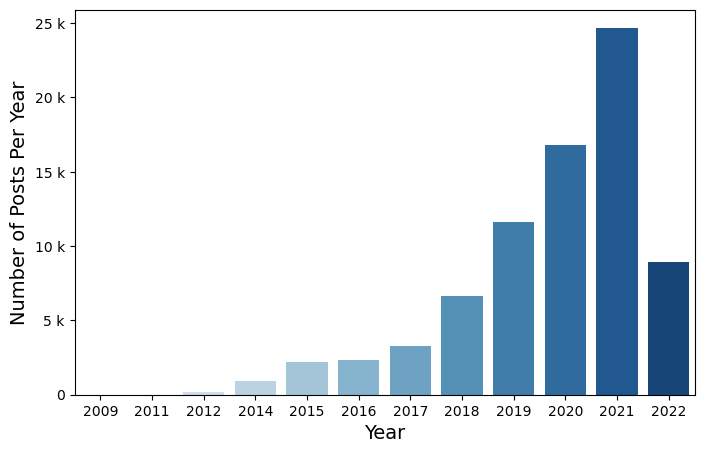

In [820]:
import seaborn as sns
import matplotlib.ticker as ticker
plt.figure(figsize=(8,5))
ax = sns.countplot(x = 'year', data = post_df, palette = 'Blues')
ax.set_ylabel('Number of Posts Per Year',fontsize = 14)
ax.set_xlabel('Year',fontsize = 14)
ax.yaxis.set_major_formatter(ticker.EngFormatter())

plt.show()

In [809]:
#post_df.to_pickle("./posts_df.pkl")

In [3]:
post_df = pd.read_pickle("./posts_df.pkl")  

In [570]:
post_df.iloc[1].url

'https://old.reddit.com/r/selfimprovement/comments/uiqcne/im_24_and_i_cant_get_out_of_my_comfort_zone_maybe/'

# Begin Modeling Section

## LSA model

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

docs = post_df.title_selftext
#vec = CountVectorizer(min_df = .05)
vec = TfidfVectorizer(min_df = .0001)
doc_term = vec.fit_transform(docs)

In [29]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(5)
lsa.fit(doc_term)

TruncatedSVD(n_components=5)

In [30]:
terms = list(vec.vocabulary_.keys())

In [31]:
def get_top_terms(topic_index, n_terms, model=lsa, terms=terms):
    
    # get the topic components (i.e., term weights)
    H = model.components_
    H[topic_index]
    
    # get term indices, sorted (descending) by topic weights
    indices = np.argsort(H[topic_index])[::-1][:n_terms]
    
    # use the `terms` array to get the actual top terms
    topics = []
    for i in indices:
        topics.append(terms[i])
    
    return (topics)

In [32]:
get_top_terms(2,10)

['dosent',
 'unravel',
 'hyperfocused',
 'lifechanging',
 'reprogram',
 'classically',
 'iron',
 'taco',
 'sexist',
 'log']

## LSA nouns

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

docs = post_df.nouns
vec = CountVectorizer(min_df = .05)
#vec = TfidfVectorizer(min_df = .05)
doc_term = vec.fit_transform(docs)

In [34]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(5)
lsa.fit(doc_term)

TruncatedSVD(n_components=5)

In [35]:
terms = list(vec.vocabulary_.keys())

In [36]:
def get_top_terms(topic_index, n_terms, model=lsa, terms=terms):
    
    # get the topic components (i.e., term weights)
    H = model.components_
    H[topic_index]
    
    # get term indices, sorted (descending) by topic weights
    indices = np.argsort(H[topic_index])[::-1][:n_terms]
    
    # use the `terms` array to get the actual top terms
    topics = []
    for i in indices:
        topics.append(terms[i])
    
    return (topics)

In [37]:
get_top_terms(3,10)

['get',
 'class',
 'person',
 'goal',
 'guy',
 'please',
 'try',
 'health',
 'lot',
 'month']

## NMF model

In [38]:
remove = ['na','url','improve']

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

docs = post_df.title_selftext
#vec = CountVectorizer(min_df = .05, max_df = .9)
vec = TfidfVectorizer(min_df = .05, max_df = .9, stop_words = remove)
doc_term = vec.fit_transform(docs)

In [40]:
terms = list(vec.vocabulary_.keys())

In [41]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=25)
doc_topic = nmf.fit_transform(doc_term)

/Users/maxwood/opt/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [42]:
def get_top_terms(topic_index, n_terms, model=nmf, terms=terms):
    
    # get the topic components (i.e., term weights)
    H = model.components_
    H[topic_index]
    
    # get term indices, sorted (descending) by topic weights
    indices = np.argsort(H[topic_index])[::-1][:n_terms]
    
    # use the `terms` array to get the actual top terms
    topics = []
    for i in indices:
        topics.append(terms[i])
    
    return (topics)

In [43]:
get_top_terms(4,10)

['finally',
 'positive',
 'word',
 'less',
 'one',
 'pretty',
 'question',
 'person',
 'call',
 'others']

## NMF nouns

In [631]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

docs = post_df.nouns_verbs
#vec = CountVectorizer(min_df = .05, max_df = .9)
vec = TfidfVectorizer(min_df = .05, max_df = .9)
doc_term = vec.fit_transform(docs)

In [632]:
terms = list(vec.vocabulary_.keys())

In [633]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=10)
doc_topic = nmf.fit_transform(doc_term)

/Users/maxwood/opt/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [634]:
def get_top_terms(topic_index, n_terms, model=nmf, terms=terms):
    
    # get the topic components (i.e., term weights)
    H = model.components_
    H[topic_index]
    
    # get term indices, sorted (descending) by topic weights
    indices = np.argsort(H[topic_index])[::-1][:n_terms]
    
    # use the `terms` array to get the actual top terms
    topics = []
    for i in indices:
        topics.append(terms[i])
    
    return (topics)

In [635]:
get_top_terms(0,10)

['book',
 'hour',
 'ask',
 'hate',
 'share',
 'understand',
 'see',
 'plan',
 'class',
 'stay']

## LDA model

In [636]:
# It sort of seems like some shorter post lengths are messing with me so I'm going to drop those
post_df['post_length'] = post_df.tokenized_selftext.apply(lambda x: len(x))

In [864]:
bins = list(np.logspace(0,4,55))

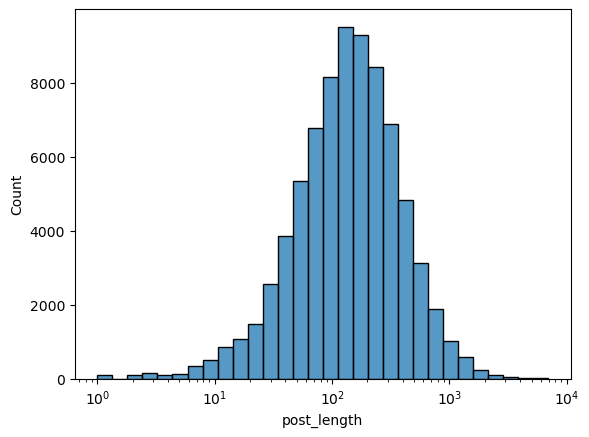

In [867]:
import seaborn as sns
ax = sns.histplot(x = 'post_length', data = post_df, log_scale = True,bins =  30 )
plt.show()

In [648]:
post_df_sm = post_df.where(post_df.post_length>50).dropna()

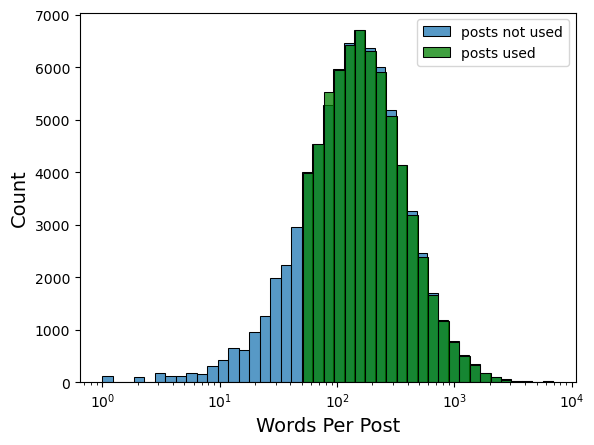

In [893]:
import seaborn as sns
ax = sns.histplot(x = 'post_length', data = post_df, log_scale = True,bins = 43)
ax = sns.histplot(x = 'post_length', data = post_df_sm, log_scale = True, color = 'green', bins = 24)
ax.legend(['posts not used','posts used'])
ax.set_ylabel('Count',fontsize = 14)
ax.set_xlabel('Words Per Post',fontsize = 14)
plt.show()

In [835]:
len(post_df_sm)

64902

In [650]:
consider_removing = ['like','feel','think',
                     'life','improve','selfimprovement',
                     'thing','want','make','would','get',
                     'become','improvement','good','na',
                     'need','find','something',
                     'even','people','go','url',
                     'selfdevelopement','know','way','really',
                     'tony','robbins','david','rselfimprovement',
                     'take'] 

In [651]:
# make the bow and term doc matrix the same (this is whats giving you errors)

from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models, matutils

docs = post_df_sm.title_selftext

vectorizer = TfidfVectorizer(min_df = .001, max_df = .999, stop_words = consider_removing)
vectorized = vectorizer.fit_transform(docs)
doc_tokenized = vectorizer.inverse_transform(vectorized)

dictionary = corpora.Dictionary()
bow = [dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized]

term_doc_matrix = vectorizer.fit_transform(docs).transpose()

In [672]:
num_topics = 14

In [673]:
corpus = matutils.Sparse2Corpus(term_doc_matrix)
id2word = dict((v,k) for k, v in vectorizer.vocabulary_.items())
lda = models.LdaModel(corpus = corpus, num_topics = num_topics, id2word = id2word, random_state = 21)

In [674]:
topics = lda.print_topics()

In [675]:
topics

[(0,
  '0.012*"friend" + 0.011*"girl" + 0.010*"social" + 0.009*"talk" + 0.007*"guy" + 0.006*"school" + 0.006*"conversation" + 0.006*"confidence" + 0.006*"group" + 0.005*"woman"'),
 (1,
  '0.011*"medium" + 0.010*"phone" + 0.009*"reddit" + 0.009*"social" + 0.009*"app" + 0.008*"use" + 0.008*"video" + 0.007*"watch" + 0.007*"facebook" + 0.007*"internet"'),
 (2,
  '0.013*"entrepreneurship" + 0.012*"ect" + 0.010*"german" + 0.009*"press" + 0.009*"unimportant" + 0.009*"practise" + 0.009*"patch" + 0.009*"comic" + 0.008*"bald" + 0.008*"selfimprove"'),
 (3,
  '0.007*"job" + 0.006*"team" + 0.006*"leadership" + 0.006*"assertive" + 0.006*"manager" + 0.006*"2015" + 0.005*"interview" + 0.005*"company" + 0.005*"military" + 0.004*"cur"'),
 (4,
  '0.017*"fapping" + 0.015*"carnegie" + 0.015*"authority" + 0.015*"scientific" + 0.014*"revolve" + 0.012*"dale" + 0.010*"keen" + 0.010*"manly" + 0.010*"roughly" + 0.010*"perfectionist"'),
 (5,
  '0.025*"english" + 0.024*"professionally" + 0.024*"french" + 0.021*"la

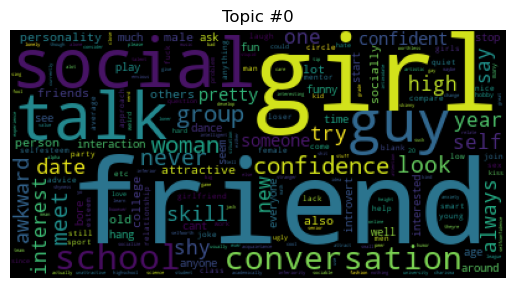

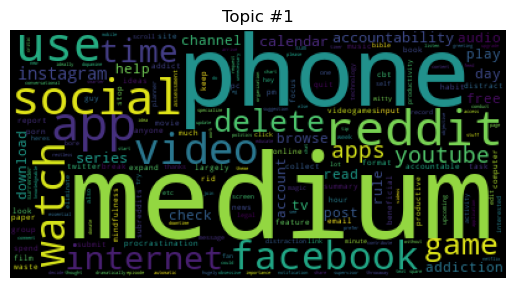

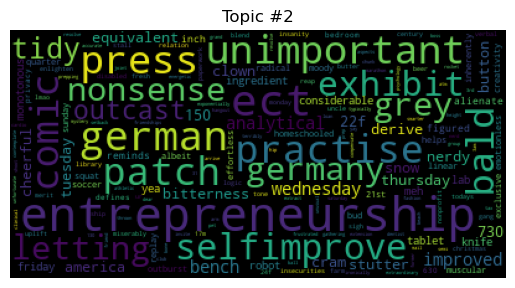

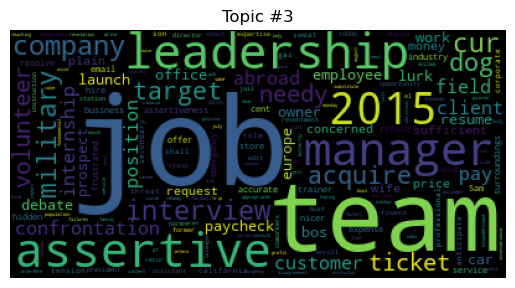

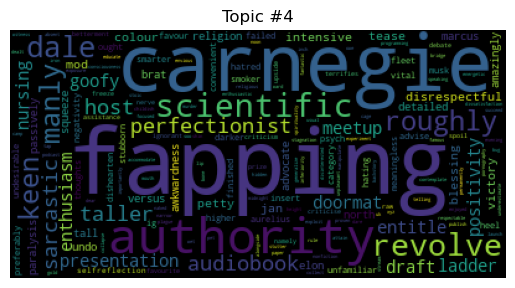

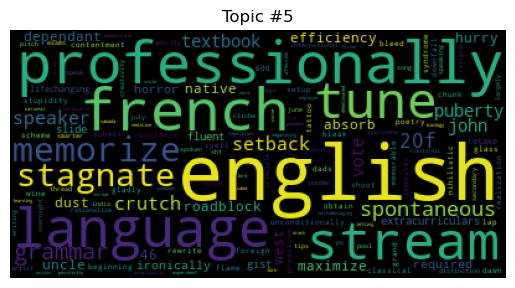

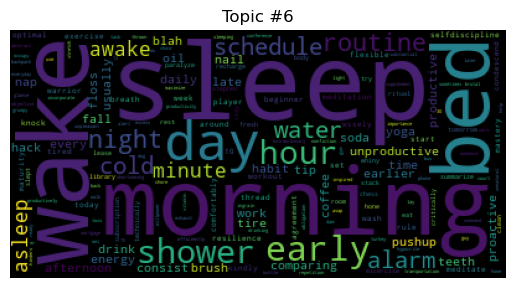

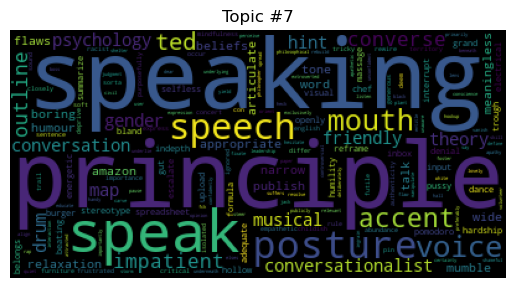

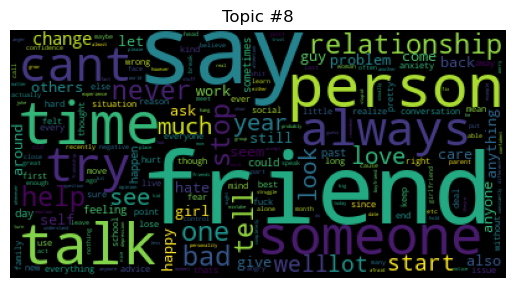

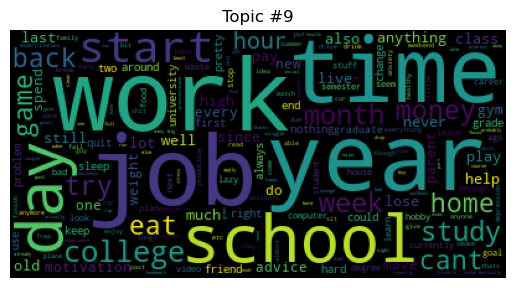

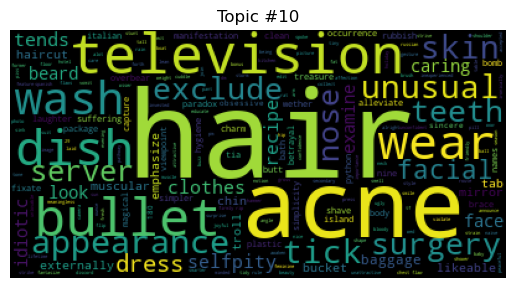

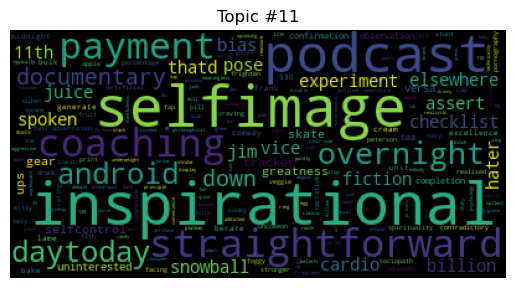

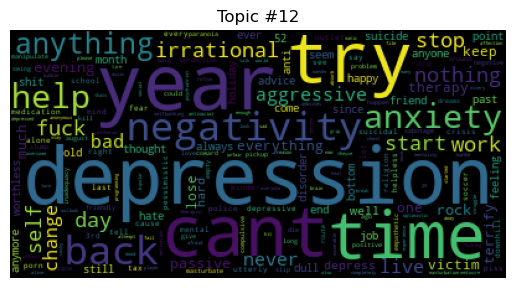

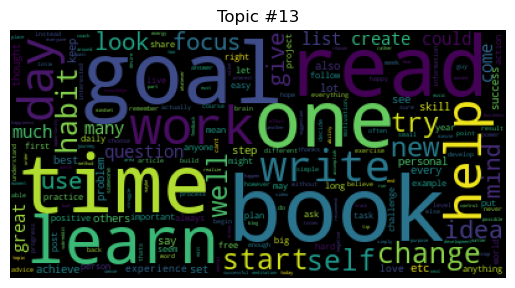

In [769]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for t in range(lda.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [676]:
doc_tops = lda.get_document_topics(bow)

In [677]:
post_df_sm['doc_tops'] = doc_tops

In [1052]:
post_analyzed = post_df_sm[['title','selftext','date_time','doc_tops']]

In [1053]:
post_analyzed['dt_simplified'] = post_analyzed.date_time.apply(lambda x: dt.datetime(x.year,x.month,1))

/Users/maxwood/opt/miniconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1054]:
def topic_getter(topic,topic_list):
    this = [x[1] for x in topic_list if x[0] == topic]
    if len(this) ==0: return(0)
    if len(this) >0: return(this[0])

In [1055]:
for top_num in list(range(num_topics)):
    post_analyzed['top_'+str(top_num)] = post_analyzed.doc_tops.apply(lambda x: topic_getter(top_num, x))

/Users/maxwood/opt/miniconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1056]:
for top_num in list(range(num_topics)):
    m = post_analyzed['top_'+str(top_num)].max()
    print('top score for topic '+str(top_num)+' is '+str(m))

top score for topic 0 is 0.5637992024421692
top score for topic 1 is 0.40776488184928894
top score for topic 2 is 0.3379397690296173
top score for topic 3 is 0.520720899105072
top score for topic 4 is 0.27101317048072815
top score for topic 5 is 0.21133127808570862
top score for topic 6 is 0.39349451661109924
top score for topic 7 is 0.3714412450790405
top score for topic 8 is 0.824545681476593
top score for topic 9 is 0.7419766187667847
top score for topic 10 is 0.2383868396282196
top score for topic 11 is 0.31141650676727295
top score for topic 12 is 0.6958386301994324
top score for topic 13 is 0.7998188138008118


In [1057]:
sentiments = post_analyzed.groupby(by = ['dt_simplified']).sum()

In [1061]:
sentiments_percent = post_analyzed.groupby(by = ['dt_simplified']).sum()

In [1067]:
sentiments

,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10,top_11,top_12,top_13
dt_simplified,,,,,,,,,,,,,,
2011-05-01,0.118526,0.096992,0.035061,0.000000,0.000000,0.000000,0.000000,0.080024,0.000000,0.124528,0.035781,0.051601,0.220544,0.225011
2011-07-01,0.000000,0.079420,0.043481,0.071172,0.023281,0.000000,0.065493,0.046118,0.188838,0.130987,0.025909,0.046821,0.097886,0.177481
2012-02-01,0.457686,0.373597,0.309580,0.633989,0.101268,0.086929,0.127536,0.359416,1.327742,0.978846,0.107519,0.072925,0.663669,1.360813
2012-03-01,0.694486,0.152607,0.177912,0.554136,0.076252,0.089613,0.115818,0.287077,1.218272,0.733172,0.151322,0.173875,0.518891,2.008973
2012-04-01,0.565926,0.237928,0.263823,0.514448,0.160214,0.124011,0.152124,0.329267,1.356344,0.387530,0.127672,0.181578,0.644260,1.891078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,164.177128,93.663624,77.135249,126.260245,46.600116,27.294221,68.707744,95.251855,331.801662,211.963482,41.568656,63.251431,198.707017,366.567825
2022-02-01,134.320947,83.866302,65.359345,106.964764,35.583434,22.382730,58.709887,74.106217,269.440679,181.120491,34.611338,51.234355,163.458560,299.481807
2022-03-01,162.086289,97.010746,72.888932,125.130874,46.271726,26.630877,67.712115,89.360553,317.318371,202.504709,41.286034,57.707588,187.610334,347.075258


In [1068]:
cols = list(sentiments.columns)
sentiments_averaged = sentiments[cols].div(sentiments[cols].sum(axis = 1),axis = 0)

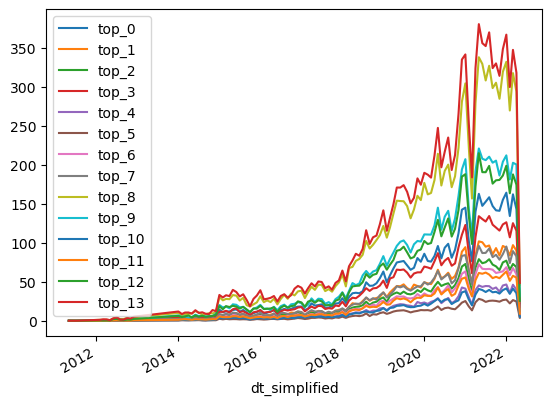

In [1070]:
sentiments.plot()
plt.show()

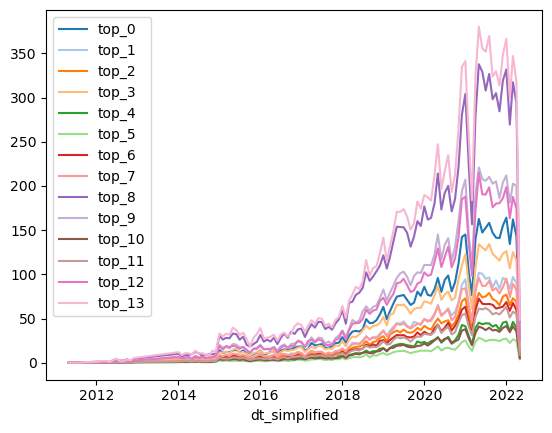

In [1163]:
ax = sns.lineplot(data = sentiments,palette = 'tab20',dashes = False)
ax
plt.show()

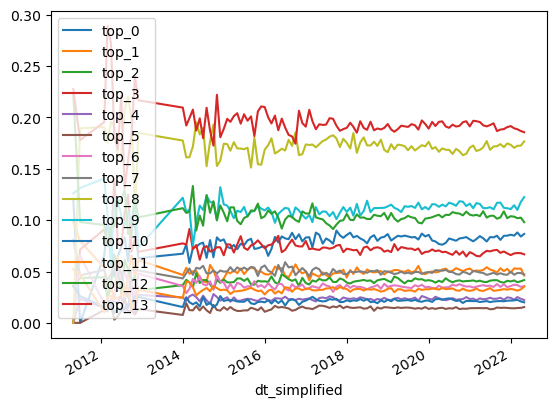

In [1071]:
sentiments_averaged.plot()
plt.show()

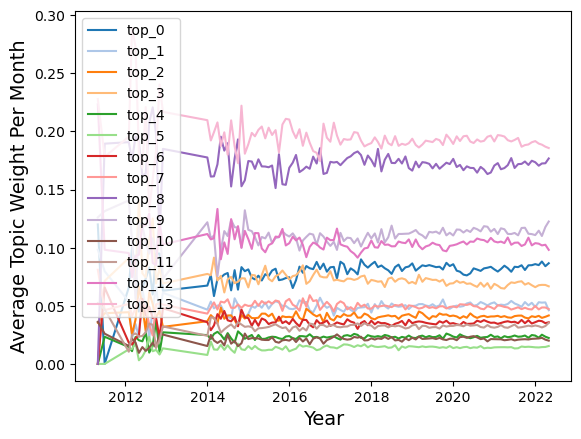

In [1222]:
ax = sns.lineplot(data = sentiments_averaged,palette = 'tab20',dashes = False)
ax.set_ylabel('Average Topic Weight Per Month',fontsize = 14)
ax.set_xlabel('Year',fontsize = 14)
plt.show()

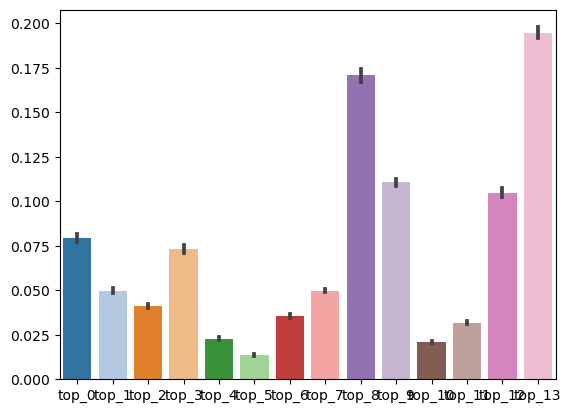

In [1169]:
ax = sns.barplot(data = sentiments_averaged,palette = 'tab20')
plt.show()

In [1258]:
sentiments_averaged

,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10,top_11,top_12,top_13
dt_simplified,,,,,,,,,,,,,,
2011-05-01,0.119958,0.098164,0.035484,0.000000,0.000000,0.000000,0.000000,0.080990,0.000000,0.126032,0.036213,0.052224,0.223207,0.227728
2011-07-01,0.000000,0.079668,0.043617,0.071394,0.023354,0.000000,0.065697,0.046262,0.189428,0.131396,0.025990,0.046967,0.098192,0.178035
2012-02-01,0.065745,0.053666,0.044470,0.091071,0.014547,0.012487,0.018320,0.051629,0.190726,0.140608,0.015445,0.010475,0.095334,0.195477
2012-03-01,0.099892,0.021950,0.025590,0.079704,0.010968,0.012890,0.016659,0.041292,0.175230,0.105456,0.021765,0.025009,0.074635,0.288961
2012-04-01,0.081590,0.034302,0.038036,0.074168,0.023098,0.017879,0.021932,0.047471,0.195546,0.055871,0.018407,0.026178,0.092884,0.272639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,0.085824,0.048963,0.040323,0.066003,0.024360,0.014268,0.035917,0.049793,0.173450,0.110804,0.021730,0.033065,0.103875,0.191624
2022-02-01,0.084979,0.053058,0.041350,0.067672,0.022512,0.014161,0.037143,0.046884,0.170463,0.114587,0.021897,0.032414,0.103413,0.189469
2022-03-01,0.088062,0.052706,0.039601,0.067984,0.025140,0.014469,0.036788,0.048550,0.172400,0.110021,0.022431,0.031353,0.101929,0.188567


In [1049]:
post_analyzed.sort_values(by = 'top_13',ascending = False).head(10)

,title,selftext,date_time,year,month,doc_tops,top_0,top_1,top_2,top_3,...,top_6,top_7,top_8,top_9,top_10,top_11,top_12,top_13,top_topic,dt_simplified
174736,Today I…,I am so happy for myself because today was a v...,2021-09-17 06:17:17+00:00,2021.0,9.0,"[(1, 0.105727404), (3, 0.06024127), (13, 0.799...",0.000000,0.105727,0.000000,0.060241,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.799819,13,2021-09-01
4372,How to Take Control of Your Life,We all want to feel like we have the power in...,2022-04-28 17:43:08+00:00,2022.0,4.0,"[(8, 0.17535008), (13, 0.7387911)]",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.175350,0.000000,0.000000,0.0,0.000000,0.738791,13,2022-04-01
599976,How do i stop worrying about getting power??,What should i do if a one of my nieces or litt...,2018-12-24 09:42:33+00:00,2018.0,12.0,"[(0, 0.07447526), (3, 0.09615657), (4, 0.06426...",0.074475,0.000000,0.000000,0.096157,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.723003,13,2018-12-01
432101,Anyone who has tried biohacking: was it worth ...,I'm looking into biohacking my whole life from...,2020-04-29 19:39:32+00:00,2020.0,4.0,"[(0, 0.093589135), (1, 0.085605524), (12, 0.08...",0.093589,0.085606,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.080854,0.688867,13,2020-04-01
243671,What is Self-identity and why is it important?,"In order to actually improve myself, I need to...",2021-06-12 20:19:33+00:00,2021.0,6.0,"[(2, 0.12345941), (8, 0.15005404), (13, 0.6801...",0.000000,0.000000,0.123459,0.000000,...,0.000000,0.0,0.150054,0.000000,0.000000,0.0,0.000000,0.680134,13,2021-06-01
194254,Is there a martial art you can learn on your own?,I am in a town where there are no places I can...,2021-08-23 04:24:26+00:00,2021.0,8.0,"[(1, 0.2631437), (13, 0.67967945)]",0.000000,0.263144,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.679679,13,2021-08-01
233836,sleepiness caused by sleepines,The more lazy I am the more sleepy I get. I wi...,2021-06-27 21:38:42+00:00,2021.0,6.0,"[(0, 0.103607), (2, 0.047075603), (4, 0.034670...",0.103607,0.000000,0.047076,0.000000,...,0.000000,0.0,0.000000,0.121216,0.000000,0.0,0.000000,0.672670,13,2021-06-01
76714,Routine,I am a student and I have an upcoming exam in ...,2022-01-13 18:21:40+00:00,2022.0,1.0,"[(0, 0.13538285), (1, 0.06689357), (6, 0.09735...",0.135383,0.066894,0.000000,0.000000,...,0.097352,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.669273,13,2022-01-01
295456,Arrogant type beat,So I’ve realized lately that I tend to tap out...,2021-03-09 13:17:32+00:00,2021.0,3.0,"[(3, 0.13546379), (4, 0.046511434), (12, 0.125...",0.000000,0.000000,0.000000,0.135464,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.125824,0.661078,13,2021-03-01
649396,Recognising but struggling to implement self i...,I've been interested in self-improvement for a...,2018-05-24 12:42:36+00:00,2018.0,5.0,"[(0, 0.09035846), (10, 0.06311856), (12, 0.147...",0.090358,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.063119,0.0,0.147788,0.656626,13,2018-05-01


In [778]:
x = post_analyzed.sort_values(by = 'top_13',ascending = False).iloc[0]

In [779]:
print(x.title +'\n\n'+ x.selftext)

Today I…

I am so happy for myself because today was a very productive day, inside the home and outside. Plus I finally unclogged the drain and can now shower in peace! I am proud of myself for that the most because it was something I had been putting off for so long and now I finally went through with things. 

Despite that action being significantly smaller than all those done today, I am still proud of that little thing!


In [1083]:
def top_topic(df):
    most_discreptive = df['top_0']
    index = 0
    for top_num in list(range(num_topics)):
        if df['top_'+str(top_num)]>most_discreptive:
            most_discreptive = df['top_'+str(top_num)]
            index = top_num
    return(index)

In [1084]:
post_analyzed['top_topic'] = post_analyzed.apply(lambda x: top_topic(x),axis = 1)

/Users/maxwood/opt/miniconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1073]:
post_analyzed['dt_simplified'] = post_analyzed.date_time.apply(lambda x: dt.datetime(x.year,x.month,1))

/Users/maxwood/opt/miniconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1074]:
post_analyzed

,title,selftext,date_time,doc_tops,dt_simplified,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10,top_11,top_12,top_13
6,Improving but still hurting,Self parenting is something I've learned a bit...,2022-05-05 05:49:41+00:00,"[(0, 0.028341366), (1, 0.04929398), (2, 0.0932...",2022-05-01,0.028341,0.049294,0.093220,0.081633,0.000000,0.029477,0.000000,0.000000,0.037950,0.444798,0.000000,0.055848,0.121451,0.053110
18,"Im 24 and i can't get out of my comfort zone, ...",I'll try and make it short:\n\nI moved into an...,2022-05-05 05:33:30+00:00,"[(0, 0.07766071), (1, 0.013977412), (2, 0.0920...",2022-05-01,0.077661,0.013977,0.092006,0.075982,0.000000,0.024559,0.062726,0.017700,0.101482,0.249029,0.000000,0.060592,0.105049,0.117606
20,my self improvement goals!,First I want to lose weight. I'm 15 and am 265...,2022-05-05 05:13:46+00:00,"[(0, 0.16596423), (1, 0.036810607), (4, 0.0345...",2022-05-01,0.165964,0.036811,0.000000,0.000000,0.034542,0.067047,0.067951,0.137959,0.255945,0.219907,0.000000,0.000000,0.000000,0.000000
41,I have too many aspirations and I'm overthinki...,Hi reddit. I'm sick with covid rn and I've sel...,2022-05-05 04:04:28+00:00,"[(0, 0.08254064), (1, 0.13750315), (3, 0.14556...",2022-05-01,0.082541,0.137503,0.000000,0.145566,0.026133,0.000000,0.049289,0.000000,0.086332,0.000000,0.043029,0.000000,0.059305,0.361558
48,How to Overcome Jealousy and Begin A confidenc...,# I'm not sure if this is the right place for ...,2022-05-05 03:43:54+00:00,"[(0, 0.080660954), (1, 0.0799058), (3, 0.09307...",2022-05-01,0.080661,0.079906,0.000000,0.093077,0.013521,0.017609,0.079498,0.027930,0.073083,0.123789,0.000000,0.047793,0.164207,0.197450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764822,"So far along, so far yet to go.",I have to ask- when do you get to a point wher...,2012-02-22 09:24:48+00:00,"[(0, 0.10290612), (1, 0.036333162), (2, 0.0567...",2012-02-01,0.102906,0.036333,0.056755,0.074540,0.000000,0.014907,0.000000,0.065597,0.185987,0.161288,0.000000,0.000000,0.090499,0.209186
764892,Love yourself or you'll lose yourself.,"I grew up with body dysmorphia, eating disorde...",2012-02-11 01:16:59+00:00,"[(0, 0.06282207), (1, 0.037033617), (2, 0.0481...",2012-02-01,0.062822,0.037034,0.048140,0.074390,0.032779,0.048423,0.031889,0.033144,0.165540,0.093561,0.031722,0.017852,0.091934,0.230769
764897,Announcement.,Hello everyone.\n\nI have recently took over t...,2012-02-08 07:40:35+00:00,"[(0, 0.06341389), (2, 0.058632627), (3, 0.0801...",2012-02-01,0.063414,0.000000,0.058633,0.080104,0.000000,0.000000,0.000000,0.035984,0.202601,0.244793,0.058451,0.000000,0.091865,0.158811
764945,Do you use affirmations to improve your thinki...,"I created this site several months ago, and I ...",2011-07-15 16:15:02+00:00,"[(1, 0.07942034), (2, 0.04348116), (3, 0.07117...",2011-07-01,0.000000,0.079420,0.043481,0.071172,0.023281,0.000000,0.065493,0.046118,0.188838,0.130987,0.025909,0.046821,0.097886,0.177481


In [1082]:
post_analyzed

,title,selftext,date_time,doc_tops,dt_simplified,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10,top_11,top_12,top_13
6,Improving but still hurting,Self parenting is something I've learned a bit...,2022-05-05 05:49:41+00:00,"[(0, 0.028341366), (1, 0.04929398), (2, 0.0932...",2022-05-01,0.028341,0.049294,0.093220,0.081633,0.000000,0.029477,0.000000,0.000000,0.037950,0.444798,0.000000,0.055848,0.121451,0.053110
18,"Im 24 and i can't get out of my comfort zone, ...",I'll try and make it short:\n\nI moved into an...,2022-05-05 05:33:30+00:00,"[(0, 0.07766071), (1, 0.013977412), (2, 0.0920...",2022-05-01,0.077661,0.013977,0.092006,0.075982,0.000000,0.024559,0.062726,0.017700,0.101482,0.249029,0.000000,0.060592,0.105049,0.117606
20,my self improvement goals!,First I want to lose weight. I'm 15 and am 265...,2022-05-05 05:13:46+00:00,"[(0, 0.16596423), (1, 0.036810607), (4, 0.0345...",2022-05-01,0.165964,0.036811,0.000000,0.000000,0.034542,0.067047,0.067951,0.137959,0.255945,0.219907,0.000000,0.000000,0.000000,0.000000
41,I have too many aspirations and I'm overthinki...,Hi reddit. I'm sick with covid rn and I've sel...,2022-05-05 04:04:28+00:00,"[(0, 0.08254064), (1, 0.13750315), (3, 0.14556...",2022-05-01,0.082541,0.137503,0.000000,0.145566,0.026133,0.000000,0.049289,0.000000,0.086332,0.000000,0.043029,0.000000,0.059305,0.361558
48,How to Overcome Jealousy and Begin A confidenc...,# I'm not sure if this is the right place for ...,2022-05-05 03:43:54+00:00,"[(0, 0.080660954), (1, 0.0799058), (3, 0.09307...",2022-05-01,0.080661,0.079906,0.000000,0.093077,0.013521,0.017609,0.079498,0.027930,0.073083,0.123789,0.000000,0.047793,0.164207,0.197450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764822,"So far along, so far yet to go.",I have to ask- when do you get to a point wher...,2012-02-22 09:24:48+00:00,"[(0, 0.10290612), (1, 0.036333162), (2, 0.0567...",2012-02-01,0.102906,0.036333,0.056755,0.074540,0.000000,0.014907,0.000000,0.065597,0.185987,0.161288,0.000000,0.000000,0.090499,0.209186
764892,Love yourself or you'll lose yourself.,"I grew up with body dysmorphia, eating disorde...",2012-02-11 01:16:59+00:00,"[(0, 0.06282207), (1, 0.037033617), (2, 0.0481...",2012-02-01,0.062822,0.037034,0.048140,0.074390,0.032779,0.048423,0.031889,0.033144,0.165540,0.093561,0.031722,0.017852,0.091934,0.230769
764897,Announcement.,Hello everyone.\n\nI have recently took over t...,2012-02-08 07:40:35+00:00,"[(0, 0.06341389), (2, 0.058632627), (3, 0.0801...",2012-02-01,0.063414,0.000000,0.058633,0.080104,0.000000,0.000000,0.000000,0.035984,0.202601,0.244793,0.058451,0.000000,0.091865,0.158811
764945,Do you use affirmations to improve your thinki...,"I created this site several months ago, and I ...",2011-07-15 16:15:02+00:00,"[(1, 0.07942034), (2, 0.04348116), (3, 0.07117...",2011-07-01,0.000000,0.079420,0.043481,0.071172,0.023281,0.000000,0.065493,0.046118,0.188838,0.130987,0.025909,0.046821,0.097886,0.177481


In [1085]:
top_topic = post_analyzed[['dt_simplified','top_topic','title']]

In [1086]:
top_topic

,dt_simplified,top_topic,title
6,2022-05-01,9,Improving but still hurting
18,2022-05-01,9,"Im 24 and i can't get out of my comfort zone, ..."
20,2022-05-01,8,my self improvement goals!
41,2022-05-01,13,I have too many aspirations and I'm overthinki...
48,2022-05-01,13,How to Overcome Jealousy and Begin A confidenc...
...,...,...,...
764822,2012-02-01,13,"So far along, so far yet to go."
764892,2012-02-01,13,Love yourself or you'll lose yourself.
764897,2012-02-01,9,Announcement.
764945,2011-07-01,8,Do you use affirmations to improve your thinki...


In [1087]:
topics_df = top_topic.groupby(['dt_simplified','top_topic']).count()

In [1092]:
topics_df

title
dt_simplified top_topic       
2011-05-01    13             1
2011-07-01    8              1
2012-02-01    8              2
              9              1
              13             4
...                        ...
2022-05-01    8             91
              9             40
              11             1
              12            20
              13            99

[850 rows x 1 columns]

In [1136]:
topics_df_percent= top_topic.groupby(['dt_simplified','top_topic']).count()/topics_df_percent.groupby(['dt_simplified']).sum()

In [1137]:
topics_df_percent

title
dt_simplified top_topic          
2011-05-01    13         1.000000
2011-07-01    8          1.000000
2012-02-01    8          0.285714
              9          0.142857
              13         0.571429
...                           ...
2022-05-01    8          0.344697
              9          0.151515
              11         0.003788
              12         0.075758
              13         0.375000

[850 rows x 1 columns]

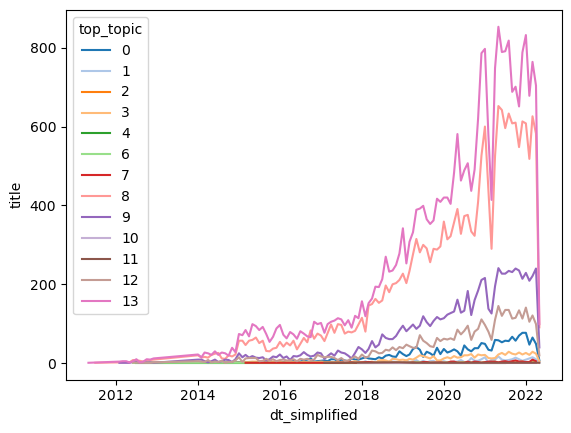

In [1113]:
sns.lineplot(data = topics_df,x = 'dt_simplified',y = 'title',hue = 'top_topic',palette = 'tab20')
plt.show()

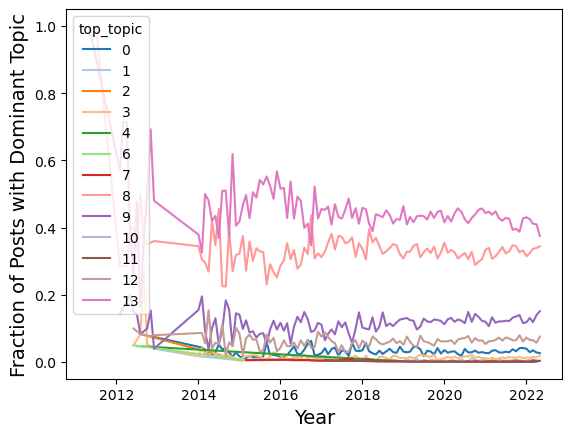

In [1256]:
ax = sns.lineplot(data = topics_df_percent,x = 'dt_simplified',y = 'title',hue = 'top_topic',palette = 'tab20')
ax.set_ylabel('Fraction of Posts with Dominant Topic',fontsize = 14)
ax.set_xlabel('Year',fontsize = 14)
plt.show()

In [1242]:
topics_for_bar = topics_df.groupby(['top_topic']).title.sum()

In [1243]:
topics_df

title
dt_simplified top_topic       
2011-05-01    13             1
2011-07-01    8              1
2012-02-01    8              2
              9              1
              13             4
...                        ...
2022-05-01    8             91
              9             40
              11             1
              12            20
              13            99

[850 rows x 1 columns]

In [1244]:
topics_for_bar = topics_for_bar.sort_values(ascending = False)

In [1247]:
topics_for_bar.values

array([28073, 21317,  7870,  4126,  2054,   879,   327,   124,    55,
          48,    18,     6,     5])

/Users/maxwood/opt/miniconda3/envs/metis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


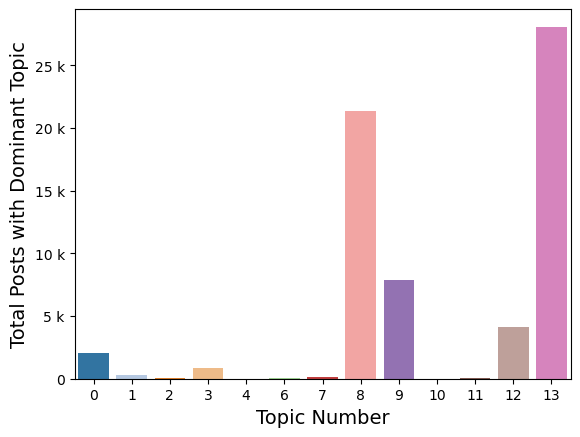

In [1260]:
ax = sns.barplot(topics_for_bar.index, topics_for_bar.values ,palette = 'tab20')
ax.set_xlabel('Topic Number',fontsize = 14)
ax.set_ylabel('Total Posts with Dominant Topic',fontsize = 14)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

In [1012]:
dt.datetime(2020,1,1)

datetime.datetime(2020, 1, 1, 0, 0)